*** No CODEPAGE record, no encoding_override: will use 'ascii'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       30 non-null     float64
 1   Y       30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
[[0.90855142 1.61656054]
 [0.95645395 1.59597943]
 [0.09420832 1.43904846]
 [1.45663625 1.63714165]
 [0.49259774 1.47763804]
 [1.30095302 2.6694559 ]
 [1.46861189 0.430574  ]
 [1.68097979 1.25896373]
 [1.00156217 2.78522465]
 [0.01357238 0.20229517]
 [0.98639304 0.47756754]
 [1.52849006 0.25117531]
 [0.54648809 0.22030365]
 [0.16326781 0.12254337]
 [0.98040522 0.28461962]
 [1.4714062  0.22544892]
 [1.44146712 0.22287629]
 [0.74089254 0.12254337]
 [1.16922104 0.16370559]
 [0.9057571  0.10453489]
 [0.10019614 0.24603004]
 [0.04031797 0.05565476]
 [0.98639304 0.31291865]
 [0.66025661 0.56503726]
 [1.77997837 0.10710753]
 [0.86064888 0.05

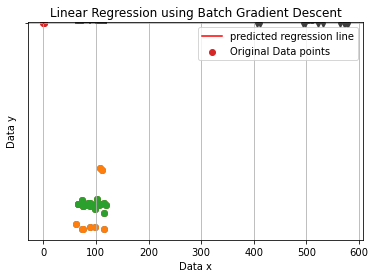

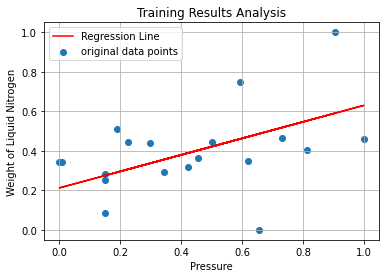

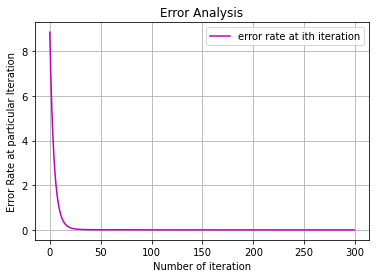

62.2 406.7 120.0 578.6
enter pressure90345
459.25822720144777 577.8
458.26518829499435 577.0
476.1398886111558 570.9
508.2895232075851 578.6
488.30461521521016 572.4
505.06214676161153 411.2
508.5377829341985 531.7
443.24547483488647 563.9
498.85565359627765 406.7
478.374226150676 507.1
457.64453897846096 496.4
509.7790815672652 505.2
489.42178398497026 506.4
481.4774727333429 510.2
457.76866884176764 503.9
447.5900200506201 506.2
448.2106693671535 506.3
462.73386337403474 510.2
502.3312897688646 508.6
496.86957578337086 510.9
476.01575874784913 505.4
477.2570573809159 512.8

 98556.83791601307
4479.856268909685


In [6]:
# BATCH GRADIENT DESCENT

# importing all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale

# READING THE  DATA SET
data = pd.read_excel(r"C:\Users\Krishnasai\pressure_weight.xls")
data.head()

# DATA ANALYSIS AND VISUALISATION

data.info()

data.describe()

#NULL value Treatment

data.isnull().sum()

#no null values

# Outliers Treatment

sns.boxplot(x=data['X'])

sns.boxplot(x=data['Y'])

#There are some outliers,removing them using
#1.z-score 2.ITQ

# Z-SCORE
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

threshold = 3
print(np.where(z > 3))

#no outliners are found using Z-score test

# Visualising data points using a Scatter plot
plt.scatter(data['X'],data['Y'])

# Implementing ITQ
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
iqr

print(data.shape)

data_cleared = data[~((data < (q1 - 1.5 * iqr)) |(data > (q3 + 1.5 * iqr))).any(axis=1)]
data_cleared.shape

#After implementing ITQ, 8 rows are treated as outliners and those are ignored from dataset

sns.boxplot(x=data_cleared['X'])

# outliners are reduced
sns.boxplot(x=data_cleared['Y'])

# scatter plot of data before data clean
plt.scatter(data['X'],data['Y'])

#scatter plot of data after data clean
plt.scatter(data_cleared['X'],data_cleared['Y'])

data2 = data.copy()
data = data_cleared.copy()

from sklearn.model_selection import train_test_split

#Normalisation Of Data Set

data_x = data['X']
data_y = data['Y']

# normalising the data
data_x = (data_x - data_x.min())/(data_x.max() - data_x.min())
data_y = (data_y - data_y.min())/(data_y.max() - data_y.min())
data_x

data_x = np.array(data_x)
data_y = np.array(data_y)
datas =[]
for i in range(len(data_x)):
  datas.append([data_x[i],data_y[i]])

datas[1:10]

# splitting of data set into training and testing
data_train,data_test = train_test_split(datas,test_size=0.1)

data_train

#Ready To Train The Model

#STEP 2: initialising required parameters
m = 1
c = -1
iter = 1
epochs = 300
alpha = 0.1
error = []
data_train

# Gradient Descent Algorithm

# while loop is runned until iter reaches epochs
while (iter<=epochs):
  # running for loop to calculate and update model parameters for each sample
  der_m = 0
  der_c = 0
  err = 0
  for i in range(0,len(data_train)):
    # calculating derivatives of m and c
    der_m += ((data_train[i][1] - (m * data_train[i][0]) - c ))*(data_train[i][0])
    der_c +=  (data_train[i][1] - (m * data_train[i][0]) - c )

  # computing error rate with present m and c values 
  err = (der_c)**2
  err = (err)/(2*len(data_train))
  error.append(err)


  der_m = (-1)*(1/len(data_train))*der_m
  der_c = (-1)*(1/len(data_train))*der_c

  # calculating change in m and c
  change_m = (-1)*alpha*der_m
  change_c = (-1)*alpha*der_c

  #updating m and c
  m = m + change_m
  c = c + change_c


  #incrementing no of iterations
  iter = iter + 1

# computed slope and y-intercept
print(m,c)

data_test = np.array(data_test)
data_test_x = data_test[:,0]
print(data_test_x)
data_test_y = data_test[:,1]
data_test_y

# predicting results of test data set
pred = []
for i in range(len(data_test_x)):
    print((m*data_test_x[i]) +c)
    pred.append((m*data_test_x[i]) +c)

# Mean Square error of testing data

# computig mean squared error of testing data
mse = 0
for i in range(0,len(data_test)):
    mse += (data_test[i][1] - (m*data_test[i][0]) - c)**2
mse = mse/len(data_test)
mse

# Predicted Data Visualisation

plt.scatter(data_test_x,data_test_y,label="Original Data points")
plt.plot(data_test_x,pred,'r',label="predicted regression line")
plt.title("Linear Regression using Batch Gradient Descent")
plt.xlabel("Data x")
plt.ylabel("Data y")
plt.grid()
plt.legend()
plt.show()

data_train = pd.DataFrame(data_train)

data_train_pred = m*data_train[0] + c
data_train_pred

plt.plot(data_train[0],data_train_pred,'red',label="Regression Line")
plt.scatter(data_train[0],data_train[1],label="original data points")
plt.xlabel("Pressure")
plt.ylabel("Weight of Liquid Nitrogen")
plt.legend()
plt.grid()
plt.title("Training Results Analysis")
plt.show()
%matplotlib inline

data_train.head()

# Error Rate Analysis

iters = np.arange(epochs)
plt.plot(iters,error,color='m',label="error rate at ith iteration")
plt.legend()
plt.xlabel("Number of iteration")
plt.ylabel("Error Rate at particular Iteration")
plt.title("Error Analysis")
plt.grid()
plt.show()

# Mean Square Error Of Training Data

# computig mean squared error
mse = 0
mse = (data_train[1] - m*data_train[0] - c)**2
mse.sum()/len(data_train)

min_x = data2['X'].min()
max_x = data2['X'].max()
min_y = data2['Y'].min()
max_y = data2['Y'].max()
print(min_x,min_y,max_x,max_y)

#Model Ready To Take Input and Produce Output

input_x = float(input("enter pressure"))
input_x = (input_x - min_x)/(max_x - min_x)
output_y = m*input_x + c
output_y = (output_y)*(max_y - min_y) + min_y
output_y

err = 0
for i in range(0,len(data_x)):
  input_x = data2['X'][i]
  input_x = (input_x - min_x)/(max_x - min_x)
  output_y = m*input_x + c
  output_y = (output_y)*(max_y - min_y) + min_y
  err += (output_y-data2['Y'][i])**2
  print(output_y,data2['Y'][i])

print("\n",err)
print(err/len(data_x))

